In [1]:
!pip install --quiet climetlab matplotlib

# WeatherBench

This is an attempt to reproduce this research: https://arxiv.org/abs/2002.00469. There is a notebook available at: https://binder.pangeo.io/v2/gh/pangeo-data/WeatherBench/master?filepath=quickstart.ipynb

In [2]:
import matplotlib.pyplot as plt

In [3]:
import climetlab as cml

In [4]:
ds = cml.load_dataset("weather-bench")

In [5]:
ds

Home page,https://raspstephan.github.io/blog/weatherbench/
Documentation,-
Citation,"@article{rasp2020weatherbench, title={WeatherBench: A benchmark dataset for data-driven weather forecasting}, author={Rasp, Stephan and Dueben, Peter D and Scher, Sebastian and Weyn, Jonathan A and Mouatadid, Soukayna and Thuerey, Nils}, journal={arXiv preprint arXiv:2002.00469}, year={2020} }"
Licence,-


In [6]:
print(ds.citation)

@article{rasp2020weatherbench,
  title={WeatherBench: A benchmark dataset for data-driven weather forecasting},
  author={Rasp, Stephan and Dueben, Peter D and Scher, Sebastian and Weyn, Jonathan A and Mouatadid, Soukayna and Thuerey, Nils},
  journal={arXiv preprint arXiv:2002.00469},
  year={2020}
}



In [7]:
z500 = ds.to_xarray()

In [8]:
z500

<xarray.Dataset>
Dimensions:  (lat: 32, lon: 64, time: 350640)
Coordinates:
    level    int32 500
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * lat      (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
  * time     (time) datetime64[ns] 1979-01-01 ... 2018-12-31T23:00:00
Data variables:
    z        (time, lat, lon) float32 dask.array<chunksize=(8760, 32, 64), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-10 11:30:13 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...

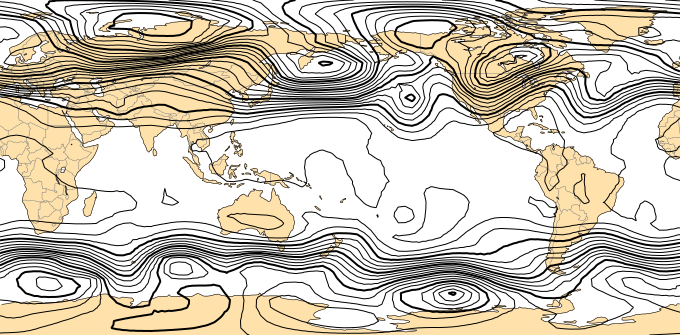

In [9]:
cml.plot_map(z500)

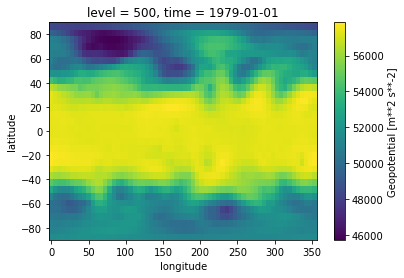

In [10]:
z500.z.isel(time=0).plot()

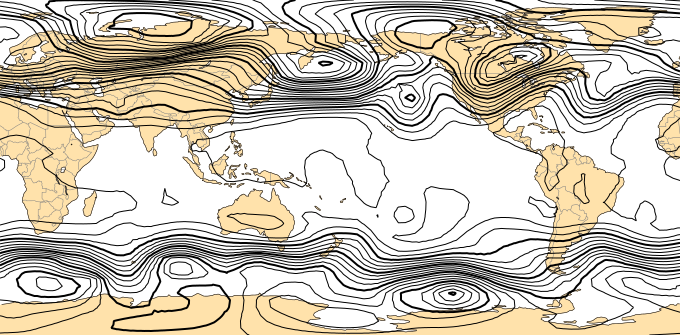

In [11]:
cml.plot_map(z500.z.isel(time=0))

In [12]:
climatology = z500.sel(time=slice('2016', '2016')).mean('time').load()

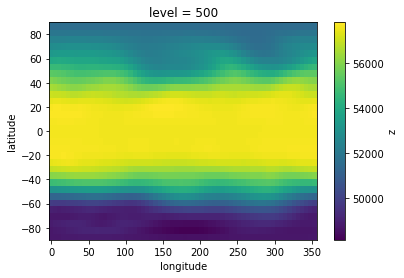

In [13]:
climatology.z.plot()

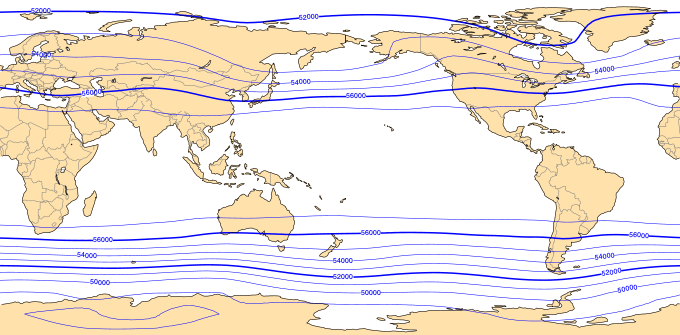

In [14]:
cml.plot_map(climatology.z)

In [15]:
climatology.z

<xarray.DataArray 'z' (lat: 32, lon: 64)>
array([[48765.18 , 48774.066, 48782.83 , ..., 48745.145, 48750.582,
        48757.645],
       [48755.164, 48798.348, 48845.02 , ..., 48690.23 , 48700.72 ,
        48721.727],
       [48890.742, 48941.703, 48997.42 , ..., 48815.234, 48822.87 ,
        48850.105],
       ...,
       [52378.613, 52398.484, 52420.074, ..., 52361.254, 52363.426,
        52366.344],
       [51937.207, 51943.78 , 51950.414, ..., 51906.508, 51919.223,
        51928.72 ],
       [51565.38 , 51571.426, 51578.15 , ..., 51543.97 , 51551.11 ,
        51558.305]], dtype=float32)
Coordinates:
    level    int32 500
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * lat      (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19